Epoch [1/3], Loss: 0.1715, Accuracy: 94.99%
Epoch [2/3], Loss: 0.0500, Accuracy: 98.49%
Epoch [3/3], Loss: 0.0337, Accuracy: 98.94%


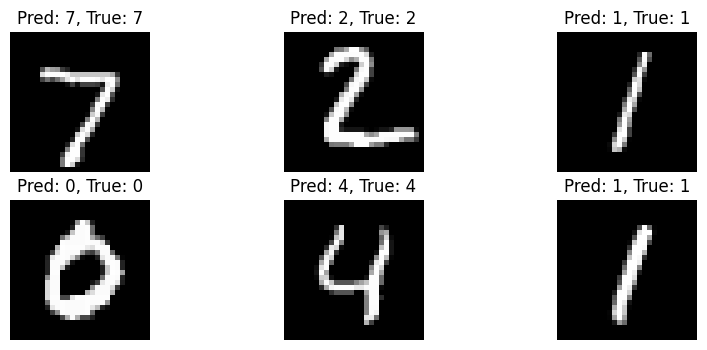

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# ---------------------
# 1. لود داده‌ها
# ---------------------
data = np.load(r"D:\GitHubProjects\Daily-Neural-Network-Exercise\data\mnist.npz")
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# نرمال‌سازی و افزودن کانال
x_train = torch.tensor(x_train / 255.0, dtype=torch.float32).unsqueeze(1)  # (N, 1, 28, 28)
x_test = torch.tensor(x_test / 255.0, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# DataLoader
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test, y_test), batch_size=64)

# ---------------------
# 2. تعریف مدل
# ---------------------
class CNNMaxPoolAllParams(nn.Module):
    def __init__(self):
        super(CNNMaxPoolAllParams, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)

        # MaxPool با همه پارامترها
        self.pool1 = nn.MaxPool2d(
            kernel_size=2,    # اندازه پنجره
            stride=2,         # گام حرکت
            padding=0,        # پدینگ
            dilation=1,       # فاصله بین پیکسل‌های داخل پنجره
            return_indices=False, # اندیس بیشینه‌ها رو برنگردونه
            ceil_mode=False   # از floor به‌جای ceil استفاده کنه
        )

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNMaxPoolAllParams()

# ---------------------
# 3. آموزش مدل
# ---------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print(f"Epoch [{epoch+1}/3], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")

# ---------------------
# 4. ارزیابی و نمایش چند پیش‌بینی
# ---------------------
model.eval()
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = outputs.max(1)

# نمایش 6 نمونه
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
    plt.axis('off')
plt.show()
